<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas==1.0.1

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

In [4]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00


In [5]:
#Shapefile of Berlin from https://hub.arcgis.com/datasets/esri-de-content::bezirke-berlin/about
! wget -q -O berlin.zip https://docs.google.com/uc?id=1N7YjXUVVv1-a5G69lQ4ioxMwcDvgCn3t&export=download

zip_ref = zipfile.ZipFile('berlin.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ber0=gpd.read_file('Berlin_Bezirke.shp')

<Axes: >

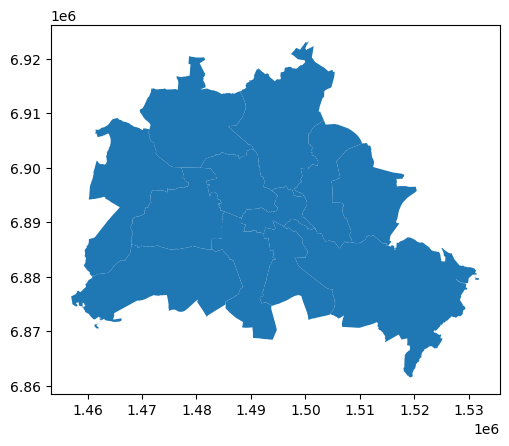

In [ ]:
ber0.plot()

#Foreign Born Population Berlin

In [6]:
#importing data on foreign born population in Berlin from https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/
berfb=pd.read_excel('https://docs.google.com/uc?id=1UIpvSj5-CwQHJVkxhfSCEDBlJdvHPGw_&export=download')

In [7]:
#importing data on berlin total population from https://de.statista.com/statistik/daten/studie/1109841/umfrage/einwohnerzahl-bezirke-berlin/
berpop=pd.read_excel('https://docs.google.com/uc?id=1tlVbOworGPcjJCKMP7UK_3y9S_KKHRiX&export=download')

In [8]:
berfb.head(2)

,Bezirk,Ausländer
0,Mitte,148409
1,Neukölln,93045


In [9]:
berpop.head(2)

,Bezirk,Einwohnerzahl
0,Pankow,424307
1,Mitte,397134


In [10]:
merged_berpop = pd.merge(berfb, berpop, on='Bezirk')

In [11]:
merged_berpop.head(2)

,Bezirk,Ausländer,Einwohnerzahl
0,Mitte,148409,397134
1,Neukölln,93045,330017


In [12]:
merged_berpop['Ausländer'].astype(float)
merged_berpop['Einwohnerzahl'].astype(float)


,Ausländer
0,148409.0
1,93045.0
2,81506.0
3,92071.0
4,89525.0
5,66954.0
6,59817.0
7,55123.0
8,81457.0
9,75946.0


,Einwohnerzahl
0,397134.0
1,330017.0
2,355868.0
3,343081.0
4,293454.0
5,257091.0
6,268792.0
7,310446.0
8,424307.0
9,311881.0


In [13]:
merged_berpop['Percentage Foreign Born']=(merged_berpop['Ausländer'] / merged_berpop['Einwohnerzahl']) * 100

In [14]:
merged_berpop.head(2)

,Bezirk,Ausländer,Einwohnerzahl,Percentage Foreign Born
0,Mitte,148409,397134,37.370006
1,Neukölln,93045,330017,28.194002


In [15]:
merged_berpop['Percentage Foreign Born']=merged_berpop['Percentage Foreign Born'].astype(int)

In [16]:
ber0.columns

Index(['Gemeinde_n', 'Gemeinde_s', 'Land_name', 'Land_schlu', 'Schluessel',
       'geometry'],
      dtype='object')

In [17]:
ber0['Gemeinde_n']

,Gemeinde_n
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [18]:
ber0.rename(columns={'Gemeinde_n': 'Bezirk'}, inplace=True)

In [19]:
ber0['Bezirk']

,Bezirk
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [20]:
berfb_map = pd.merge(ber0, merged_berpop, on='Bezirk',how='outer',indicator=True)
berfb_map[['Bezirk','Percentage Foreign Born','_merge']]

berfb_map2 = pd.merge(ber0, merged_berpop, on='Bezirk',how='inner',indicator=False)

,Bezirk,Percentage Foreign Born,_merge
0,Charlottenburg-Wilmersdorf,26,both
1,Friedrichshain-Kreuzberg,30,both
2,Lichtenberg,24,both
3,Marzahn-Hellersdorf,18,both
4,Mitte,37,both
5,Neukölln,28,both
6,Pankow,19,both
7,Reinickendorf,22,both
8,Spandau,26,both
9,Steglitz-Zehlendorf,17,both


array([[<Axes: title={'center': 'Ausländer'}>,
        <Axes: title={'center': 'Einwohnerzahl'}>],
       [<Axes: title={'center': 'Percentage Foreign Born'}>, <Axes: >]],
      dtype=object)

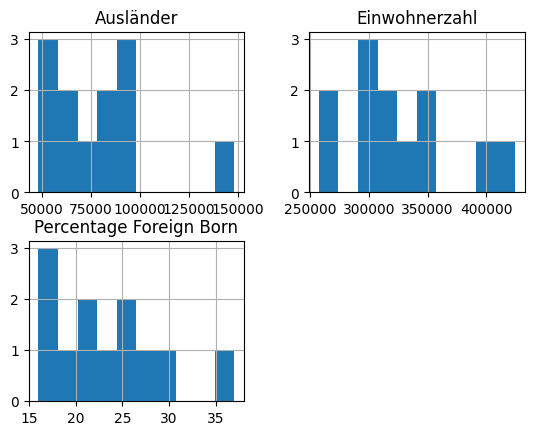

In [21]:
merged_berpop.hist()

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/')

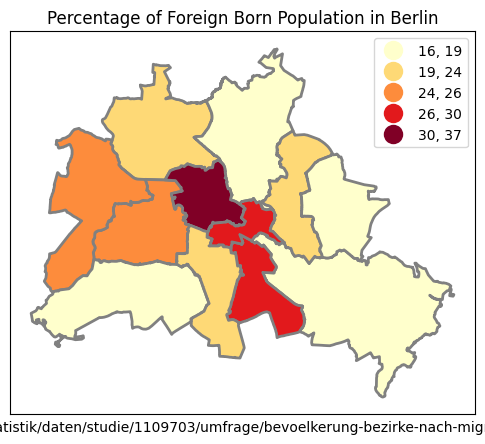

In [22]:
fig, ax = plt.subplots(1, figsize=(6,10))
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/')

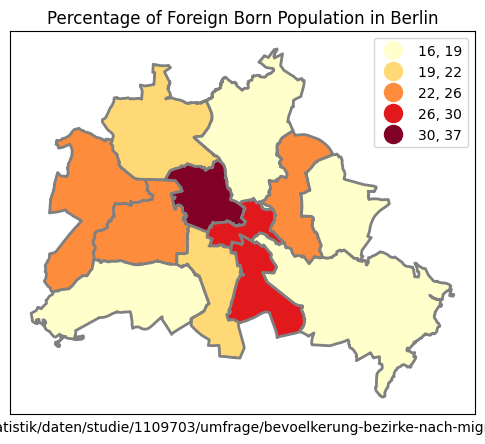

In [23]:
fig, ax = plt.subplots(1, figsize=(6,10))
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')

#Housing Projects Berlin

In [24]:
housing_projects=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/Hausprojekte_Berlin.xlsx')

In [25]:
housing_projects.head(25)

,Housing Project,Address
0,Bödi 9,Bödikerstr. 9 10245 Berlin
1,Chuzpe Plietsch,Karl-Marx-Str. 282 12057 Berlin
2,Grüni,Gruenberger Str. 73 10245 Berlin
3,H48,"Hermannstraße 38, 12049 Berlin"
4,Hausprojekt Burge,"Burgemeisterstraße 17, 12099 Berlin, Deutschland"
5,Hausprojekt M29,Malmöer Str. 29 10439 Berlin
6,Hausprojekt Rahnsdorf,Püttbergeweg 77 12589 Berlin
7,Jagow 15,Jagowstr. 15 13585 Berlin
8,Jetty,Röbellweg 14 13125 Berlin
9,Kastanie,Kastanienallee 85 10435 Berlin


In [26]:
from geopandas.tools import geocode

In [27]:
locations = geocode(housing_projects['Address'], provider='nominatim', user_agent='myName',timeout=2)
locations.head(5)

,geometry,address
0,POINT (13.46374 52.49999),"9, Bödikerstraße, Rudolfkiez, Friedrichshain, ..."
1,POINT (13.44374 52.46384),"282, Karl-Marx-Straße, Neukölln, Berlin, 12057..."
2,POINT (13.45953 52.51145),"Stadtteilladen Zielona Góra, 73, Grünberger St..."
3,POINT (13.42883 52.47206),"Hermannstraße, Rollbergsiedlung, Neukölln, Ber..."
4,POINT (13.37973 52.4575),"17, Burgemeisterstraße, Tempelhof, Tempelhof-S..."


<Axes: >

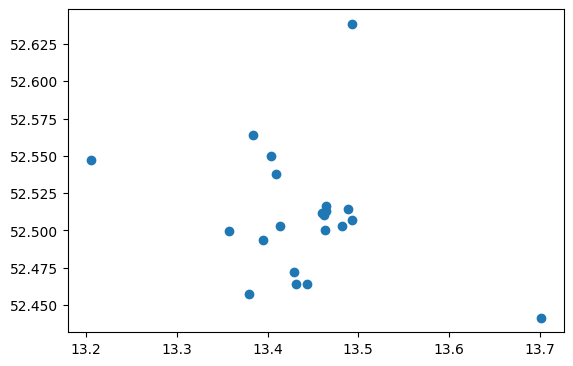

In [28]:
locations.plot()

<Axes: >

[]

[]

Text(0.5, 23.52222222222222, 'https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/')

<Axes: title={'center': 'Percentage of Foreign Born Population in Berlin'}, xlabel='https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/'>

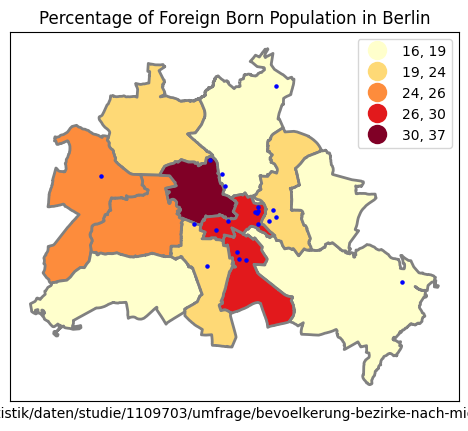

In [29]:
#line 1 and two adapted from chatGPT suggestion on how to make two maps I am overlaying the same size
if berfb_map2.crs != locations.crs:
    berhp = locations.to_crs(berfb_map2.crs)

fig, ax = plt.subplots()
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')
berhp.plot(ax=ax, color='blue', markersize=5)

#Airbnbs

In [116]:
#data from https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021
airbnb_ber=pd.read_csv('https://raw.githubusercontent.com/hbeck118/GIS/main/airbnb_berlin.csv')

In [117]:
airbnb_ber.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285


In [118]:
airbnb_group=airbnb_ber.groupby('neighbourhood_group').size()

<Axes: xlabel='neighbourhood_group'>

Text(0.5, 0, 'District')

Text(0, 0.5, 'Number of Airbnbs')

Text(0.5, 1.0, 'Airbnbs in Berlin')

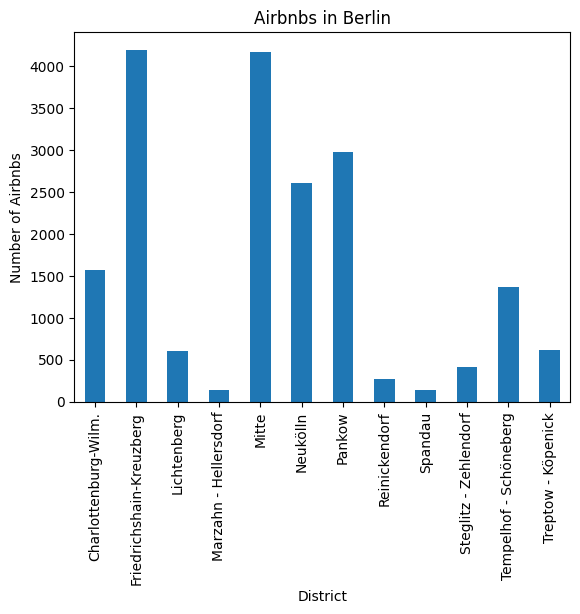

In [119]:
airbnb_group.plot(kind='bar')

# Add labels
plt.xlabel('District')
plt.ylabel('Number of Airbnbs')
plt.title('Airbnbs in Berlin')

In [128]:
airbnb_group

,neighbourhood_group,count,Bezirk
0,Charlottenburg-Wilm.,1567.0,Charlottenburg-Wilmersdorf
1,Friedrichshain-Kreuzberg,4197.0,Friedrichshain-Kreuzberg
2,Lichtenberg,612.0,Lichtenberg
3,Marzahn - Hellersdorf,142.0,Marzahn-Hellersdorf
4,Mitte,4173.0,Mitte
5,Neukölln,2608.0,Neukölln
6,Pankow,2981.0,Pankow
7,Reinickendorf,271.0,Reinickendorf
8,Spandau,138.0,Spandau
9,Steglitz - Zehlendorf,415.0,Steglitz-Zehlendorf


In [121]:
#code to access neighborhood group column instead of having it as the index from gemini AI
airbnb_group = airbnb_group.reset_index().rename(columns={0: 'count'})

In [125]:
airbnb_group['Bezirk'] = airbnb_group['neighbourhood_group'].str.strip().str.replace(' ', '')
airbnb_group['Bezirk'].replace('Charlottenburg-Wilm.', 'Charlottenburg-Wilmersdorf', inplace=True)

<ipython-input-125-4856de1a35da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_group['Bezirk'].replace('Charlottenburg-Wilm.', 'Charlottenburg-Wilmersdorf', inplace=True)


In [127]:
airbnb_group['count'] = airbnb_group['count'].astype(float)

In [95]:
ber0['Bezirk']

,Bezirk
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [130]:
airbnb_map = pd.merge(ber0, airbnb_group, on='Bezirk',how='outer',indicator=True)
airbnb_map[['Bezirk','count','_merge']]

airbnb_map1 = pd.merge(ber0, airbnb_group, on='Bezirk',how='inner',indicator=False)

,Bezirk,count,_merge
0,Charlottenburg-Wilmersdorf,1567.0,both
1,Friedrichshain-Kreuzberg,4197.0,both
2,Lichtenberg,612.0,both
3,Marzahn-Hellersdorf,142.0,both
4,Mitte,4173.0,both
5,Neukölln,2608.0,both
6,Pankow,2981.0,both
7,Reinickendorf,271.0,both
8,Spandau,138.0,both
9,Steglitz-Zehlendorf,415.0,both


array([[<Axes: title={'center': 'count'}>]], dtype=object)

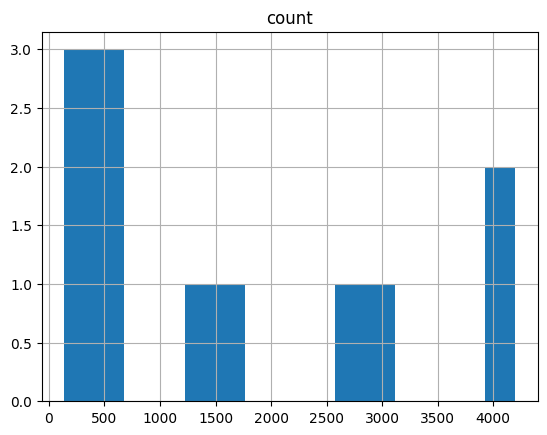

In [132]:
airbnb_group.hist(bins=15)

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021')

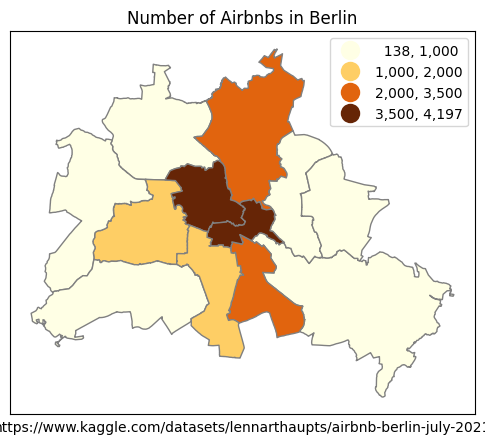

In [134]:
fig, ax = plt.subplots(1, figsize=(6,10))
airbnb_map1.plot(ax=ax,column='count',legend=True,cmap='YlOrBr',
          scheme="user_defined", classification_kwds={'bins':[1000, 2000, 3500]}, k=4, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Number of Airbnbs in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021''')

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021')

<Axes: title={'center': 'Number of Airbnbs in Berlin and Housing Projects'}, xlabel='https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021'>

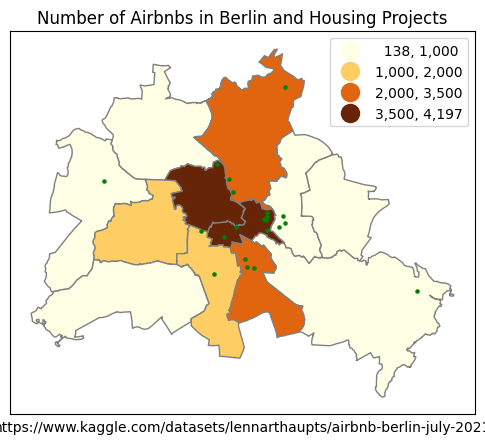

In [136]:
fig, ax = plt.subplots(1, figsize=(6,10))
airbnb_map1.plot(ax=ax,column='count',legend=True,cmap='YlOrBr',
          scheme="user_defined", classification_kwds={'bins':[1000, 2000, 3500]}, k=4, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Number of Airbnbs in Berlin and Housing Projects")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021''')
berhp.plot(ax=ax, color='green', markersize=5)


#Average Rent Berlin

In [48]:
av_rent=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/Average_Rent_Berlin.xlsx')

In [49]:
av_rent.head(2)

,Bezirk,Average Rent/Sqaure Meter
0,Mitte,8.30
1,Friedrichshain-Kreuzberg,8.19


In [50]:
av_rent.dtypes

,0
Bezirk,object
Average Rent/Sqaure Meter,float64


In [53]:
av_rent_ber = pd.merge(ber0, av_rent, on='Bezirk',how='outer',indicator=True)
av_rent_ber[['Bezirk','Average Rent/Sqaure Meter ','_merge']]

av_rent_map = pd.merge(ber0, av_rent, on='Bezirk',how='inner',indicator=False)

,Bezirk,Average Rent/Sqaure Meter,_merge
0,Charlottenburg-Wilmersdorf,8.43,both
1,Friedrichshain-Kreuzberg,8.19,both
2,Lichtenberg,7.15,both
3,Marzahn-Hellersdorf,6.29,both
4,Mitte,8.30,both
5,Neukölln,7.40,both
6,Pankow,8.05,both
7,Reinickendorf,7.13,both
8,Spandau,7.15,both
9,Steglitz-Zehlendorf,8.01,both


array([[<Axes: title={'center': 'Average Rent/Sqaure Meter '}>]],
      dtype=object)

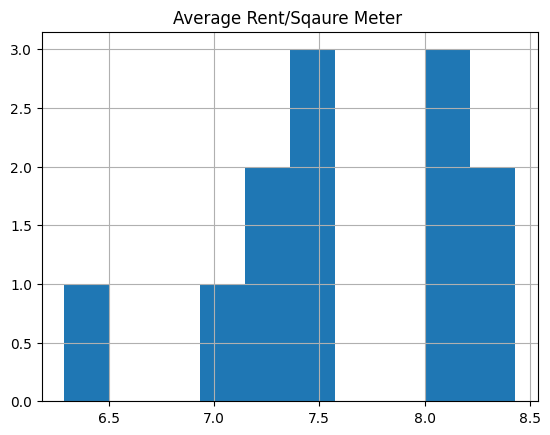

In [54]:
av_rent_map.hist()

<Axes: >

Text(0.5, 274.24344253431104, 'https://www.statistik-berlin-brandenburg.de/zensus22')

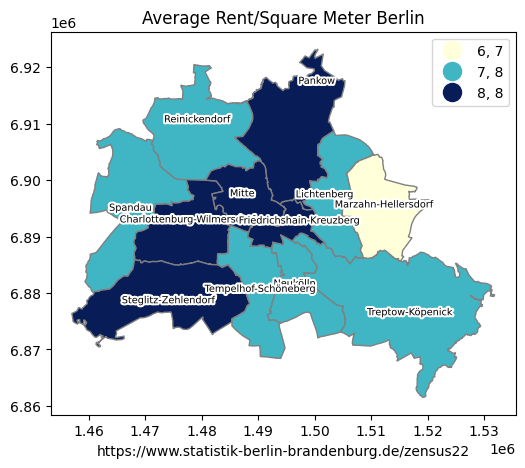

In [85]:
fig, ax = plt.subplots(1, figsize=(6,10))
av_rent_map.plot(ax=ax,column='Average Rent/Sqaure Meter ',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[6.6, 7.7]}, k=3, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Average Rent/Square Meter Berlin")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.statistik-berlin-brandenburg.de/zensus22''')
from matplotlib.patheffects import withStroke
#code for label adjusting and representative point from chat GPT
#!pip install adjustText
#from adjustText import adjust_text
for point, label in zip(ber0.geometry.representative_point(), ber0['Bezirk']):
    texts.append(ax.text(point.x, point.y, label, ha='center', fontsize=7, path_effects=[withStroke(linewidth=3, foreground='white')]))
#for point, label in zip(ber0.geometry.representative_point(), ber0['Bezirk']):
 #   if label == 'Tempelhof-Schöneberg':
  #      ax.text(point.x, point.y + 4, label, ha='center', fontsize=7, path_effects=[withStroke(linewidth=3, foreground='white')])
   # elif label == 'Charlottenburg-Wilmersdorf':
    #    ax.text(point.x - 4, point.y - 4, label, ha='center', fontsize=7, path_effects=[withStroke(linewidth=3, foreground='white')])
    #elif label == 'Friedrichshain-Kreuzberg':
     #   ax.text(point.x + 4, point.y, label, ha='center', fontsize=7, path_effects=[withStroke(linewidth=3, foreground='white')])

<Axes: >

[]

[]

Text(0.5, 23.52222222222222, 'https://www.statistik-berlin-brandenburg.de/zensus22')

<Axes: title={'center': 'Average Rent/Square Meter Berlin and Alternative Housing Projects'}, xlabel='https://www.statistik-berlin-brandenburg.de/zensus22'>

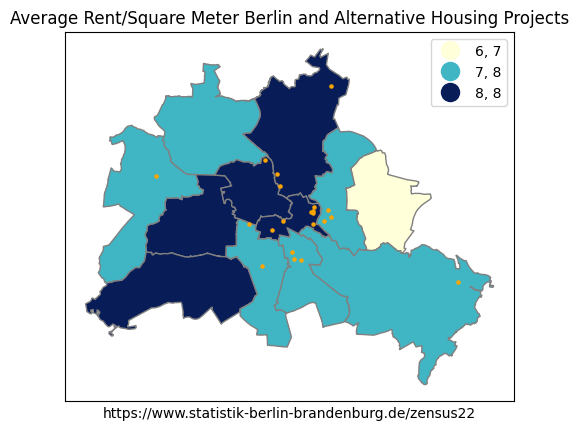

In [91]:
if av_rent_map.crs != locations.crs:
    berhp = locations.to_crs(av_rent_map.crs)

fig, ax = plt.subplots()
av_rent_map.plot(ax=ax,column='Average Rent/Sqaure Meter ',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[6.6, 7.7]}, k=3, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Average Rent/Square Meter Berlin and Alternative Housing Projects")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.statistik-berlin-brandenburg.de/zensus22''')
berhp.plot(ax=ax, color='orange', markersize=5)


#Side by side

<Axes: >

[]

[]

<Axes: title={'center': 'rent/square m and housing projects'}>

<Axes: >

[]

[]

<Axes: title={'center': 'airbnbs and housing projects'}>

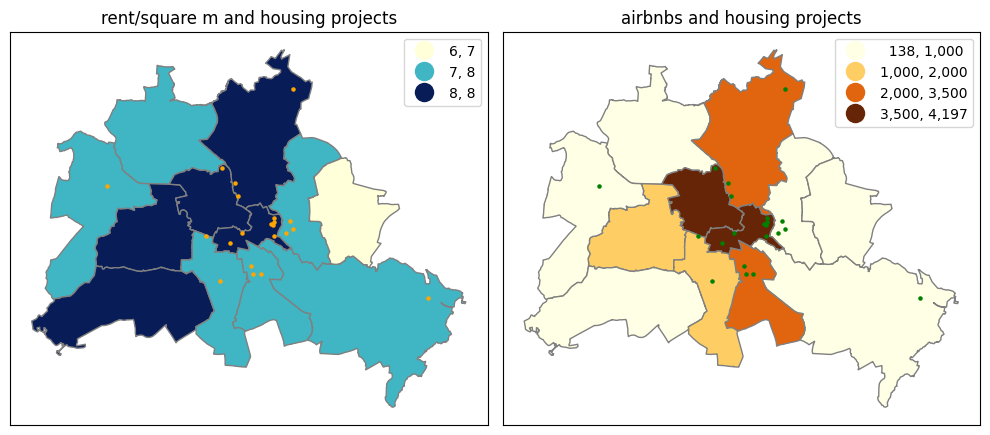

In [152]:
if av_rent_map.crs != locations.crs:
    berhp = locations.to_crs(av_rent_map.crs)
fig, axs = plt.subplots(1, 2, figsize=(10,10),sharey=True, tight_layout=True)
av_rent_map.plot(ax=axs[0],column='Average Rent/Sqaure Meter ',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[6.6, 7.7]}, k=3, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
axs[0].title.set_text("rent/square m and housing projects")
axs[0].set_xticks([]); axs[0].set_yticks([])
#axs[0].set_xlabel('''https://www.statistik-berlin-brandenburg.de/zensus22''')
berhp.plot(ax=axs[0], color='orange', markersize=5)

airbnb_map1.plot(ax=axs[1],column='count',legend=True,cmap='YlOrBr',
          scheme="user_defined", classification_kwds={'bins':[1000, 2000, 3500]}, k=4, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
axs[1].title.set_text("airbnbs and housing projects")
axs[1].set_xticks([]); axs[1].set_yticks([])
#axs[2].set_xlabel('''https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021''')
berhp.plot(ax=axs[1], color='green', markersize=5)

